In [1]:
%load_ext rpy2.ipython

In [28]:
%%R
library(phyloseq)
library(dplyr); library(tidyr)
library(ggplot2)
library(rwantshue)

In [11]:
%%R
physeq = import_biom("../data/otu_table_tax_no211_meta.biom")

In [12]:
%%R
mdf = psmelt(physeq)

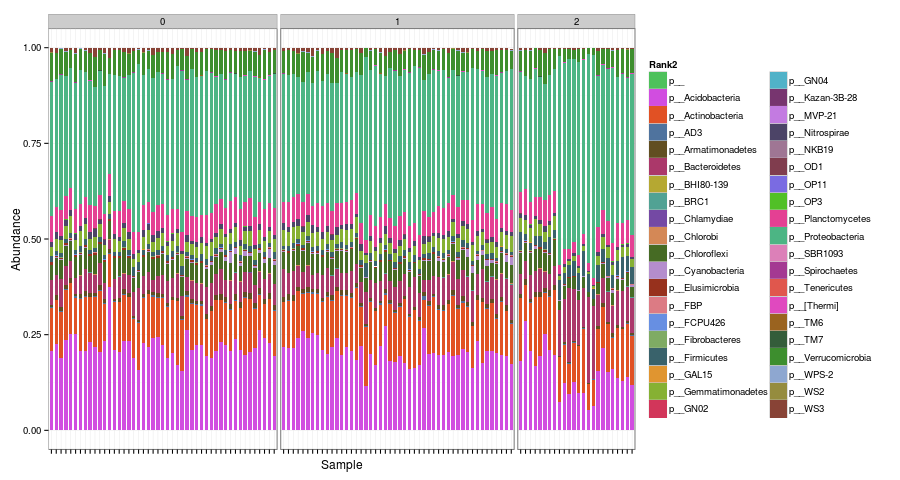

In [49]:
%%R -w 900
d.plot = mdf %>%
    group_by(Sample) %>%
    mutate(Abundance = Abundance / sum(Abundance)) %>%
    group_by(Sample, Rank2, Amdmt, Day, DayAmdmt) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(DayAmdmt) %>%
    

scheme <- iwanthue()
colors = scheme$hex(length(unique(d.plot$Rank2)), 
                    color_space = hcl_presets$intense)

p = ggplot(d.plot, aes(x = Sample, y = Abundance, fill = Rank2))

p = p + facet_grid(. ~ Amdmt, scales = "free_x", space = "free")

p = p + geom_bar(stat = "identity", width = 0.70)

p = p + scale_fill_manual(values = colors)

p = p + guides(fill = guide_legend(ncol = 2))

p = p + theme_bw()

p = p + theme(axis.text.x = element_blank())

p